In [1]:
>>> import spacy
>>> nlp = spacy.load('en_core_web_sm')

In [2]:
import spacy
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
print(len(spacy_stopwords))
for stop_word in list(spacy_stopwords)[:10]:
    print(stop_word)

326
is
‘ve
himself
this
she
along
no
not
becomes
yourselves


In [3]:
from collections import Counter
complete_text = ('Gus Proto is a Python developer currently'
    'working for a London-based Fintech company. He is'
    ' interested in learning Natural Language Processing.'
    ' There is a developer conference happening on 21 July'
    ' 2019 in London. It is titled "Applications of Natural'
    ' Language Processing". There is a helpline number '
    ' available at +1-1234567891. Gus is helping organize it.'
    ' He keeps organizing local Python meetups and several'
    ' internal talks at his workplace. Gus is also presenting'
    ' a talk. The talk will introduce the reader about "Use'
    ' cases of Natural Language Processing in Fintech".'
    ' Apart from his work, he is very passionate about music.'
    ' Gus is learning to play the Piano. He has enrolled '
    ' himself in the weekend batch of Great Piano Academy.'
    ' Great Piano Academy is situated in Mayfair or the City'
    ' of London and has world-class piano instructors.')

complete_doc = nlp(complete_text)
# Remove stop words and punctuation symbols
words = [token.text for token in complete_doc
         if not token.is_stop and not token.is_punct]
word_freq = Counter(words)
# 5 commonly occurring words with their frequencies
common_words = word_freq.most_common(5)
print (common_words)
# Unique words
unique_words = [word for (word, freq) in word_freq.items() if freq == 1]
print (unique_words)

[('Gus', 4), ('London', 3), ('Natural', 3), ('Language', 3), ('Processing', 3)]
['Proto', 'currentlyworking', 'based', 'company', 'interested', 'conference', 'happening', '21', 'July', '2019', 'titled', 'Applications', 'helpline', 'number', 'available', '+1', '1234567891', 'helping', 'organize', 'keeps', 'organizing', 'local', 'meetups', 'internal', 'talks', 'workplace', 'presenting', 'introduce', 'reader', 'Use', 'cases', 'Apart', 'work', 'passionate', 'music', 'play', 'enrolled', 'weekend', 'batch', 'situated', 'Mayfair', 'City', 'world', 'class', 'piano', 'instructors']


In [4]:
about_text = ('Gus Proto is a Python developer currently'
              ' working for a London-based Fintech'
              ' company. He is interested in learning'
              ' Natural Language Processing.')
about_doc = nlp(about_text)

In [5]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)
def extract_full_name(nlp_doc):
    pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]
    matcher.add('FULL_NAME', None, pattern)
    matches = matcher(nlp_doc)
    for match_id, start, end in matches:
        span = nlp_doc[start:end]
        return span.text

extract_full_name(about_doc)

'Gus Proto'

In [6]:
# use rule-based matching to extract phone numbers
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)
conference_org_text = ('There is a developer conference'
    'happening on 21 July 2019 in London. It is titled'
    ' "Applications of Natural Language Processing".'
    ' There is a helpline number available'
    ' at (123) 456-789')

# ORTH gives the exact text of the token.
# SHAPE transforms the token string to show orthographic features.
# OP defines operators. Using ? as a value means that the pattern is optional, meaning it can match 0 or 1 times.
def extract_phone_number(nlp_doc):
    pattern = [{'ORTH': '('}, {'SHAPE': 'ddd'},
               {'ORTH': ')'}, {'SHAPE': 'ddd'},
               {'ORTH': '-', 'OP': '?'},
               {'SHAPE': 'ddd'}]
    matcher.add('PHONE_NUMBER', None, pattern)
    matches = matcher(nlp_doc)
    for match_id, start, end in matches:
        span = nlp_doc[start:end]
        return span.text

conference_org_doc = nlp(conference_org_text)
extract_phone_number(conference_org_doc)

'(123) 456-789'

In [7]:
one_line_about_text = ('Gus Proto is a Python developer'
    ' currently working for a London-based Fintech company')
one_line_about_doc = nlp(one_line_about_text)
print (list(one_line_about_doc[5].subtree))

[a, Python, developer, currently, working, for, a, London, -, based, Fintech, company]


In [8]:
def flatten_tree(tree):
    return ''.join([token.text_with_ws for token in list(tree)]).strip()

# Print flattened subtree of `developer`
print (flatten_tree(one_line_about_doc[5].subtree))

a Python developer currently working for a London-based Fintech company


By looking at noun phrases, you can get information about your text. For example, `a developer conference` indicates that the text mentions a conference, while the date `21 July` lets you know that conference is scheduled for 21 July. You can figure out whether the conference is in the past or the future. `London` tells you that the conference is in London.



In [9]:
# Noun Phrase Detection
conference_text = ('There is a developer conference'
    ' happening on 21 July 2019 in London.')
conference_doc = nlp(conference_text)
# Extract Noun Phrases
for chunk in conference_doc.noun_chunks:
    print (chunk)

a developer conference
21 July
London


In [13]:
import textacy
import textacy.ke
about_talk_text = ('The talk will introduce reader about Use'
                   ' cases of Natural Language Processing in'
                   ' Fintech')
# pattern = r'(<VERB>?<ADV>*<VERB>+)'
about_talk_doc = textacy.make_spacy_doc(about_talk_text,
                                        lang='en_core_web_sm')
# 通过多种算法识别文档中的关键术语
textacy.ke.textrank(about_talk_doc, normalize="lemma", topn=10)

[('Natural Language Processing', 0.2262546275441627),
 ('Use case', 0.144743722583209),
 ('talk', 0.08277485376027531),
 ('reader', 0.07348835537341947),
 ('fintech', 0.04589422212543074)]

In [12]:
textacy.ke.sgrank(about_talk_doc, ngrams=(1, 2, 3, 4), normalize="lower", topn=0.1)

[('natural language processing', 0.40638777999358033)]

In [50]:
from textacy.extract import subject_verb_object_triples
def desc(t):
    return t.text, t.root, t.start
def print_triples(text):
    doc=textacy.make_spacy_doc(text, lang='en_core_web_sm')
    triples=subject_verb_object_triples(doc)
    print(doc.text)
    print([(desc(span)) for t in triples for span in t])

about_talk_text = ('The talk will introduce reader about Use'
                   ' cases of Natural Language Processing in'
                   ' Fintech')
print_triples(about_talk_text)

The talk will introduce reader about Use cases of Natural Language Processing in Fintech
[('talk', talk, 1), ('will introduce', introduce, 2), ('reader', reader, 4)]


In [55]:
# print_triples('This butterfly is blue, and it flies very fast.')
# print_triples('This butterfly flies very fast.')
print_triples('Brooks likes apples, but she likes oranges')

Brooks likes apples, but she likes oranges
[('Brooks', Brooks, 0), ('likes', likes, 1), ('apples', apples, 2), ('she', she, 5), ('likes', likes, 6), ('oranges', oranges, 7)]


You can use NER to redact people’s names from a text. For example, you might want to do this in order to hide personal information collected in a survey. You can use spaCy to do that:


In [29]:
survey_text = ('Out of 5 people surveyed, James Robert,'
               ' Julie Fuller and Benjamin Brooks like'
               ' apples. Kelly Cox and Matthew Evans'
               ' like oranges.')

def replace_person_names(token):
    if token.ent_iob != 0 and token.ent_type_ == 'PERSON':
        return '[REDACTED] '
    return token.string

def redact_names(nlp_doc):
    for ent in nlp_doc.ents:
        ent.merge()
    tokens = map(replace_person_names, nlp_doc)
    return ''.join(tokens)

survey_doc = nlp(survey_text)
redact_names(survey_doc)

'Out of 5 people surveyed, [REDACTED] , [REDACTED] and [REDACTED] like apples. [REDACTED] and [REDACTED] like oranges.'

In [35]:
text = "Mesdames et messieurs, nous allons bientôt atterrir, merci d'attacher vos ceintures."
doc = textacy.make_spacy_doc(text, lang='fr_core_news_sm')

In [36]:
triples=subject_verb_object_triples(doc)
[(desc(span)) for t in triples for span in t]

[('nous', nous, 4), ('allons', allons, 5), ('atterrir', atterrir, 7)]

,index,text,lemma,upos,xpos,entity
0,1,Mesdames,madame,NOUN,NOUN__Gender=Fem|Number=Plur,"[MISC, B]"
1,2,et,et,CCONJ,CCONJ___,"[MISC, I]"
2,3,messieurs,monsieur,NOUN,NOUN__Gender=Masc|Number=Plur,"[MISC, I]"
3,4,",",",",PUNCT,PUNCT___,"[, O]"
4,5,nous,nous,PRON,PRON__Number=Plur|Person=1,"[, O]"
5,6,allons,aller,VERB,VERB__Mood=Ind|Number=Plur|Person=1|Tense=Pres...,"[, O]"
6,7,bientôt,bientôt,ADV,ADV___,"[, O]"
7,8,atterrir,atterrir,VERB,VERB__VerbForm=Inf,"[, O]"
8,9,",",",",PUNCT,PUNCT___,"[, O]"
9,10,merci,merci,NOUN,NOUN__Gender=Masc|Number=Sing,"[, O]"


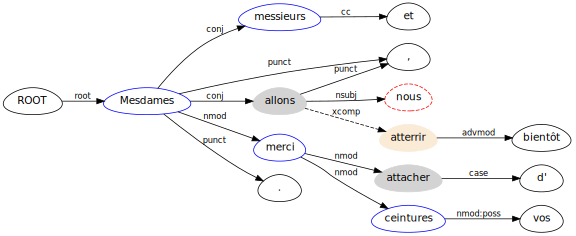

In [43]:
from sagas.nlu.spacy_helper import spacy_mgr, vis
from sagas.tracker_jupyter import enable_jupyter_tracker
enable_jupyter_tracker()

nlp_f = spacy_mgr.get_model('fr')
doc_f = nlp_f(text)
vis(doc_f, text)

,index,text,lemma,upos,xpos,entity
0,1,Benjamin,Benjamin,PROPN,NNP,"[PERSON, B]"
1,2,Brooks,Brooks,PROPN,NNP,"[PERSON, I]"
2,3,likes,like,VERB,VBZ,"[, O]"
3,4,apples,apple,NOUN,NNS,"[, O]"
4,5,",",",",PUNCT,",","[, O]"
5,6,but,but,CCONJ,CC,"[, O]"
6,7,she,-PRON-,PRON,PRP,"[, O]"
7,8,likes,like,VERB,VBZ,"[, O]"
8,9,oranges,orange,NOUN,NNS,"[, O]"


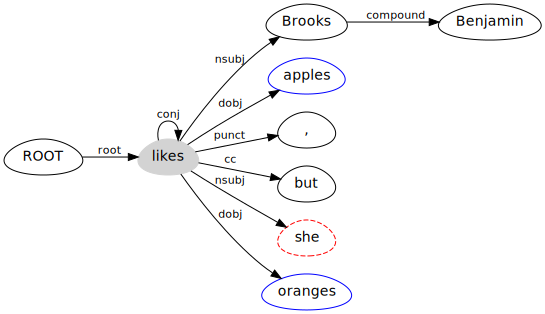

In [54]:
nlp_f = spacy_mgr.get_model('en')
# doc_f = nlp_f('This butterfly flies very fast.')
doc_f=nlp_f('Benjamin Brooks likes apples, but she likes oranges')
vis(doc_f, doc_f.text)